### Kmean - Algorithm

1. Random Centriods
2. Label data points
3. Recalculate the new centriods

In [143]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [144]:
data = pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [145]:
data.shape

(150, 6)

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


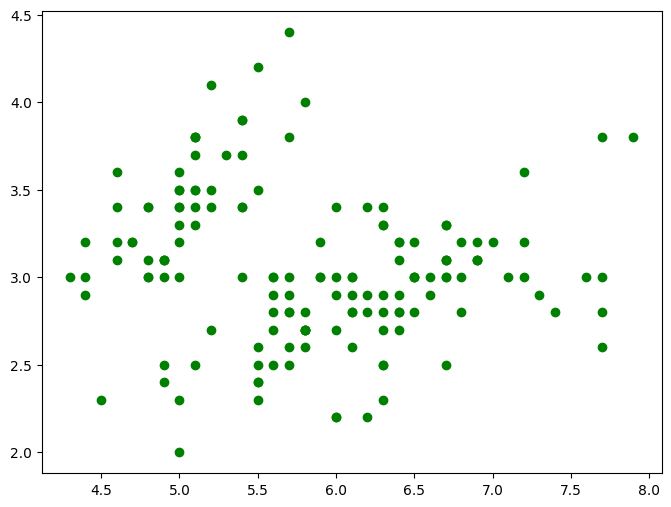

In [147]:
plt.figure(figsize = (8, 6))

plt.scatter(data['SepalLengthCm'], data['SepalWidthCm'], color = 'green')

Text(0.5, 1.0, 'Sepal Length and Width (cm)')

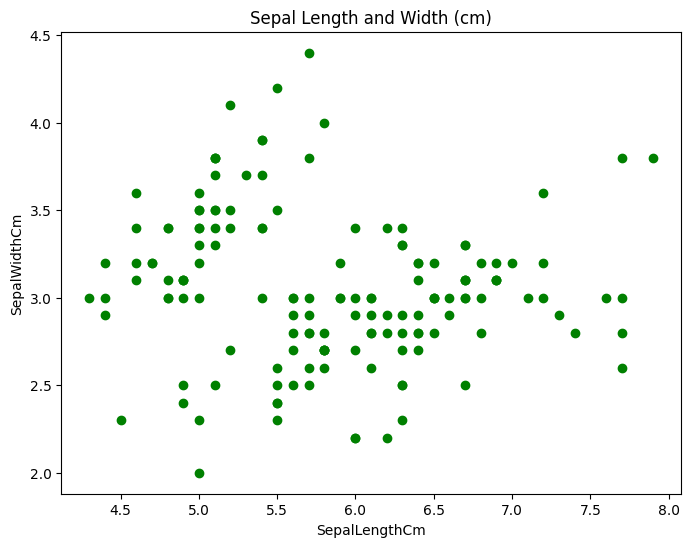

In [148]:
plt.figure(figsize = (8, 6))

plt.scatter(data['SepalLengthCm'], data['SepalWidthCm'], color = 'green')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.title('Sepal Length and Width (cm)')

Text(0.5, 1.0, 'Petal Length and Width (cm)')

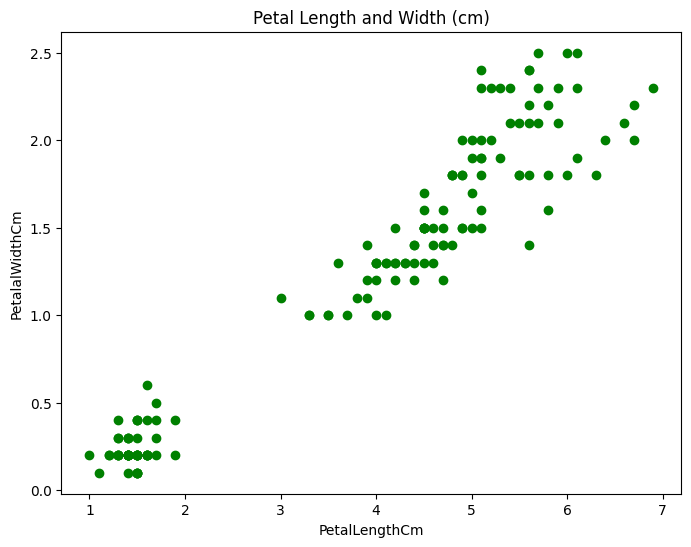

In [149]:
plt.figure(figsize = (8, 6))

plt.scatter(data['PetalLengthCm'], data['PetalWidthCm'], color = 'green')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalalWidthCm')
plt.title('Petal Length and Width (cm)')

In [150]:
# get X data - all 4 input X, no y because this is unsupervised learning

X = data[['PetalLengthCm', 'PetalWidthCm']]
X.head(3)

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2


In [151]:
# prepare a function for distance between 2 points

def distance_fn(a, b, ax = 1):
    return np.linalg.norm(a-b, axis = ax) # Euclidean distance

In [152]:
# test a function

a = np.array([10, 15])
b = np.array([4, 7])

In [153]:
from scipy.spatial import distance

In [154]:
distance.euclidean(a, b) # library function

10.0

In [155]:
distance_fn(a, b, None) # as we already defined ax, so we don't put it here again, just use None

10.0

### Round 1

In [156]:
K = 3 # there are 3 groups
X = np.array(X)
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.5, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [157]:
C_x = np.random.randint(np.min(X[:, 0]), np.max(X[:, 0]), size = K)
C_x

array([1, 3, 4])

In [158]:
C_y = np.random.randint(np.min(X[:, 1]), np.max(X[:, 1]), size = K)
C_y

array([1, 0, 0])

In [159]:
# Centriods

C = np.zeros((3, 2))
C

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [160]:
C_old = np.zeros(C.shape)
C_old

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [161]:
C[:, 0] = C_x 
C[:, 1] = C_y 
C

array([[1., 1.],
       [3., 0.],
       [4., 0.]])

Text(0.5, 1.0, 'Petal Length and Width (cm)')

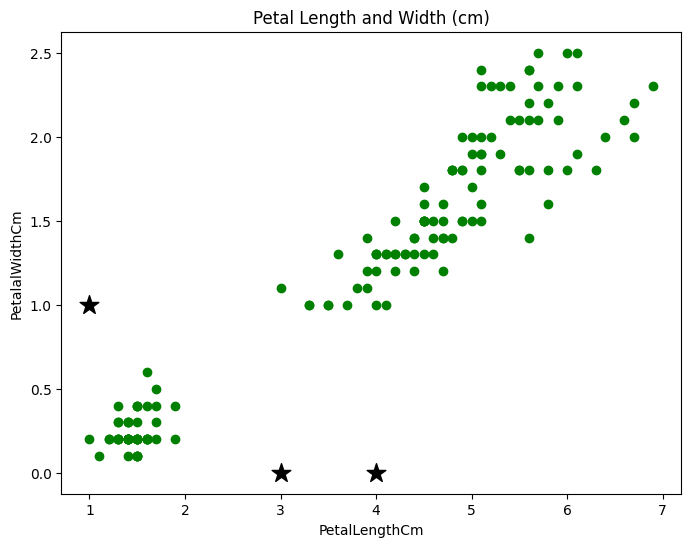

In [162]:
# plot 

plt.figure(figsize = (8, 6))

plt.scatter(data['PetalLengthCm'], data['PetalWidthCm'], color = 'green')
plt.scatter(C[:, 0], C[:, 1], marker = '*', color = 'black', s = 200 ) # scatter(x, y)
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalalWidthCm')
plt.title('Petal Length and Width (cm)')

### 2. Assign each data point to a specific cluster 

In [163]:
# measure distance for each data point to each cluster which are from the 1st random

distance = distance_fn(X[0, :], C)
distance

array([0.89442719, 1.61245155, 2.60768096])

In [164]:
np.min(distance) # get min value

0.8944271909999159

In [165]:
np.argmin(distance) # get index of min value

0

In [166]:
cluster_label = np.zeros((len(X), 1))
cluster_label

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [167]:
len(X)

150

In [168]:
for i in range(len(X)): # run 150 rounds
    distance = distance_fn(X[i, :], C)
    cluster = np.argmin(distance) # for the shortest distance
    cluster_label[i] = cluster

In [169]:
print(cluster_label)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [1.]
 [2.]
 [2.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]]


In [170]:
(cluster_label == 0).sum()

49

In [171]:
(cluster_label == 1).sum()

6

In [172]:
(cluster_label == 2).sum()

95

In [174]:
points = np.array([X[j] for j in range(len(X)) if cluster_label[j] == 1])
points

array([[1.9, 0.2],
       [3.3, 1. ],
       [3.5, 1. ],
       [3.5, 1. ],
       [3.3, 1. ],
       [3. , 1.1]])

In [175]:
len(points)

6

Text(0.5, 1.0, 'Round #1')

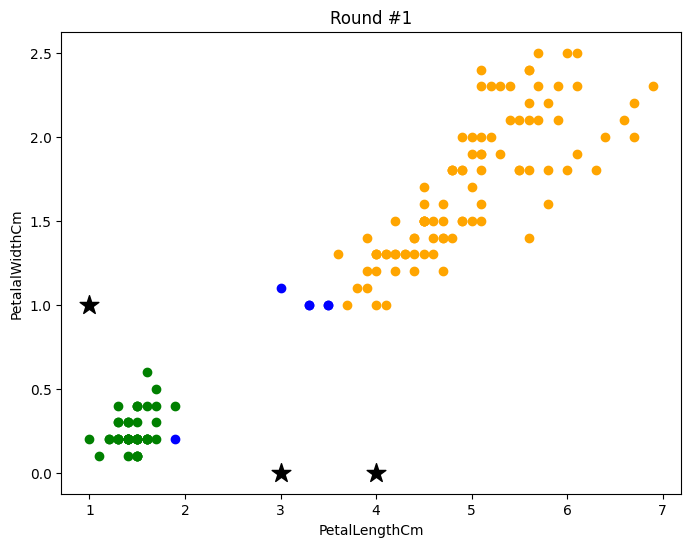

In [180]:
# plot

color = ['green', 'blue', 'orange']

plt.figure(figsize = (8, 6))

for i in range(K):
    pints = [] # empty list
    points = np.array([X[j] for j in range(len(X)) if cluster_label[j] == i])
    plt.scatter(points[:, 0], points[:, 1], c = color[i])

plt.scatter(C[:, 0], C[:, 1], marker = '*', c = 'black', s = 200)
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalalWidthCm')
plt.title('Round #1')

### 3. Recalculate the new Contriods

In [181]:
C_old = C.copy()
C_old

array([[1., 1.],
       [3., 0.],
       [4., 0.]])

In [182]:
for i in range(K):
    pints = [] # empty list
    points = np.array([X[j] for j in range(len(X)) if cluster_label[j] == i])
    C[i] = np.mean(points, axis = 0) # calculate mean and keep in C for each group (i)

In [183]:
C # new Centriods should change

array([[1.45510204, 0.24489796],
       [3.08333333, 0.88333333],
       [4.98947368, 1.71052632]])

Text(0.5, 1.0, 'Round #2')

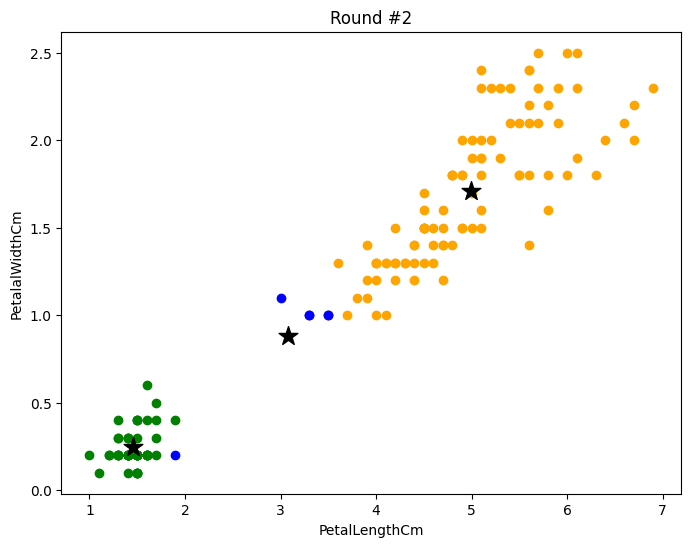

In [184]:
# plot new centriods

color = ['green', 'blue', 'orange']

plt.figure(figsize = (8, 6))

for i in range(K):
    pints = [] # empty list
    points = np.array([X[j] for j in range(len(X)) if cluster_label[j] == i])
    plt.scatter(points[:, 0], points[:, 1], c = color[i])

plt.scatter(C[:, 0], C[:, 1], marker = '*', c = 'black', s = 200)
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalalWidthCm')
plt.title('Round #2')

### Repeat step 2 and 3 using loop
- Check if centriods have changed, repeat step 2 and 3

In [186]:
error = distance_fn(C, C_old, None)
error

2.3386914355202686

In [187]:
# there is error then we repeat step 2 and 3
# repeat step 2: Assign data to new data point to specific cluster

cluster_label = np.zeros((len(X), 1))

In [188]:
for i in range(len(X)): # run 150 rounds
    distance = distance_fn(X[i, :], C)
    cluster = np.argmin(distance) # for the shortest distance
    cluster_label[i] = cluster

Text(0.5, 1.0, 'Round #1')

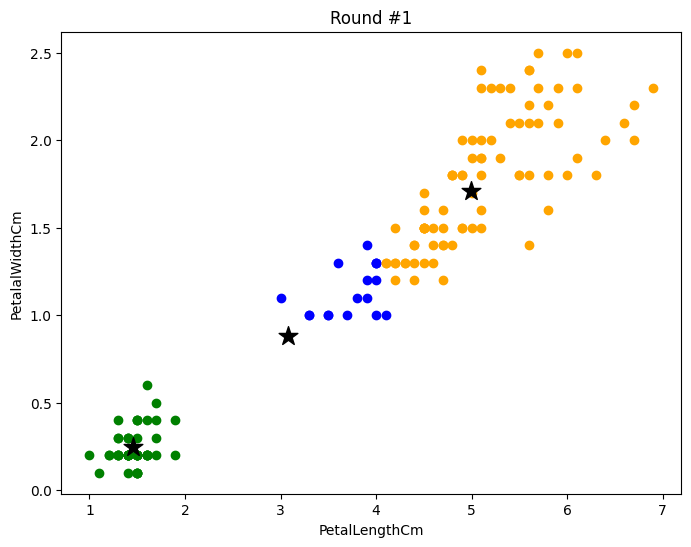

In [189]:
# plot

color = ['green', 'blue', 'orange']

plt.figure(figsize = (8, 6))

for i in range(K):
    pints = [] # empty list
    points = np.array([X[j] for j in range(len(X)) if cluster_label[j] == i])
    plt.scatter(points[:, 0], points[:, 1], c = color[i])

plt.scatter(C[:, 0], C[:, 1], marker = '*', c = 'black', s = 200)
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalalWidthCm')
plt.title('Round #1')

In [190]:
# repeat step 3: recalculate centriods

C_old = C.copy()
C_old

array([[1.45510204, 0.24489796],
       [3.08333333, 0.88333333],
       [4.98947368, 1.71052632]])

In [191]:
for i in range(K):
    pints = [] # empty list
    points = np.array([X[j] for j in range(len(X)) if cluster_label[j] == i])
    C[i] = np.mean(points, axis = 0) # calculate mean and keep in C for each group (i)

In [192]:
C

array([[1.464     , 0.244     ],
       [3.73529412, 1.13529412],
       [5.14578313, 1.78674699]])

Text(0.5, 1.0, 'Round #2')

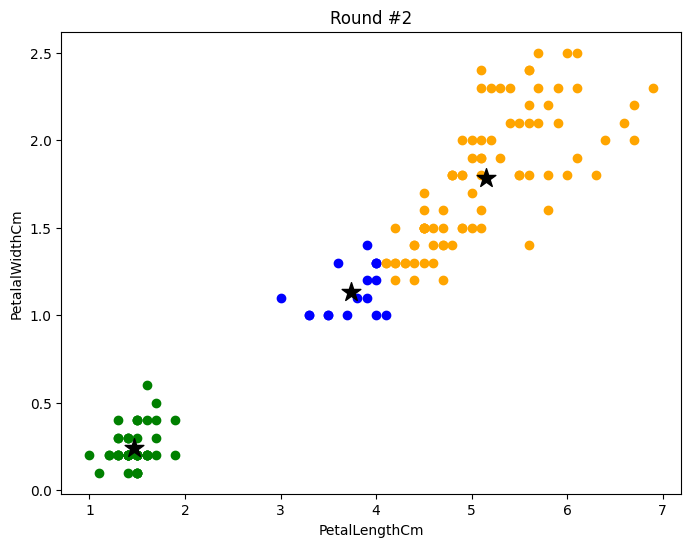

In [193]:
# plot new centriods

color = ['green', 'blue', 'orange']

plt.figure(figsize = (8, 6))

for i in range(K):
    pints = [] # empty list
    points = np.array([X[j] for j in range(len(X)) if cluster_label[j] == i])
    plt.scatter(points[:, 0], points[:, 1], c = color[i])

plt.scatter(C[:, 0], C[:, 1], marker = '*', c = 'black', s = 200)
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalalWidthCm')
plt.title('Round #2')

In [194]:
# check if  Cntriods are changed

error = distance_fn(C, C_old, None)
error

0.7203188985596162